# Intro to KNN with Scikit-learn

### Requirements for working with data in scikit-learn

1. Features and labels are separate objects
2. Features and labels should be numeric
3. Features and labels should be NumPy arrays
4. Features and labels should have specific shapes

In [58]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [59]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "x"
x = iris.data

# store label vector in "y"
y = iris.target

#Show slices
x[:3],y[3:12]

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [60]:
# Show column + row count
print y.shape
print x.shape

(150,)
(150, 4)


### K-Nearest Neighbors

### Steps
1. Select K. (How many neighbors you want to consider in your calculation)
2. Search for the K nearest neighbors
3. Set label for unknown observation to most popular label among K neighbors

### KNN classification map (K=5)

![KNN classification (K=5)](https://github.com/justmarkham/scikit-learn-videos/raw/0e26828604b503f0d66a5966de1dce57e5e88c2a/images/04_5nn_map.png)

### Build KNN Model

In [61]:
from sklearn.neighbors import KNeighborsClassifier

#"Estimator" is scikit-learn's term for model
knn = KNeighborsClassifier(n_neighbors=5)

print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [62]:
#Fit the model with data (aka "model training")
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
#Predict the response for a new observation
test_data = [[3, 5, 4, 2], [5, 4, 3, 2]]

knn.predict(test_data) #Returns a NumPy array

actual_data = x
actual_labels = y
knn_predict = knn.predict(actual_data) #Returns a NumPy array
print knn_predict

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Using a different classification model

In [68]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x, y)

# predict the response for new observations
logreg_predict = logreg.predict(actual_data)
print logreg_predict

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Comparing ML models in scikit-learn

Used three classification models: KNN (K=1), KNN (K=5), logistic regression
Need a way to choose between the models


### Classification accuracy
1. Proportion of correct predictions
2. count_correct / count_all

## Option #1: Train on entire dataset

This is what we did above so we can reuse values knn_predict, logreg_predict

In [69]:
#compute classification accuracy for the logistic regression model
from sklearn import metrics

### Logistic regression

In [70]:
predicted_labels = logreg_predict
print len(predicted_labels)

logreg_accuracy = metrics.accuracy_score(actual_labels, predicted_labels)
print logreg_accuracy

150
0.96


### KNN

In [71]:
predicted_labels = knn_predict
print len(predicted_labels)

accuracy = metrics.accuracy_score(actual_labels, predicted_labels)
print accuracy 

150
0.966666666667


### But we are overfitting by training on entire data set!!!

## Evaluation procedure #2: Train/test split

### Steps
1. Split the dataset into two pieces
2. Train the model on the training set.
3. Test the model on the testing set

### Split into training and testing sets

In [76]:
from sklearn.cross_validation import train_test_split

# Splits data 40% test, 60% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

### Train Logistic Regression

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(x_test)

print metrics.accuracy_score(y_test, y_pred)

0.95


### Train KNN (K=5)

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print metrics.accuracy_score(y_test, y_pred)

0.966666666667


### Train KNN (K=25 and K=6)

In [82]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


In [94]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#Looks like K=6-17 all return the same score
print metrics.accuracy_score(y_test, y_pred)

0.983333333333


### Use a loop to try out different Ks

In [95]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

### Plot the Range of Scores!

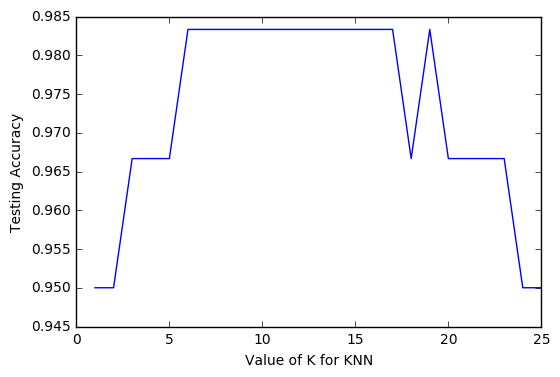

In [97]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

* Training accuracy rises as model complexity increases
* Testing accuracy penalizes models that are too complex or not complex enough

### Downsides of train/test split?

* Provides a high-variance estimate of out-of-sample accuracy
* K-fold cross-validation overcomes this limitation
* But, train/test split is still useful because of its flexibility and speed